
# Explore and structure data

In [1]:
!pip install fastai
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.structured import *
from fastai.column_data import *

C:\Users\chrun\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#!pip install kaggle

#from googleapiclient.discovery import build
#import io, os
#from googleapiclient.http import MediaIoBaseDownload
#from google.colab import auth
#auth.authenticate_user()

#!mkdir -p ~/.kaggle
#!mv kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

#!mkdir data

In [3]:
#!kaggle competitions download -c competitive-data-science-predict-future-sales --force

In [4]:
#!gunzip sample_submission.csv.gz
#!gunzip sales_train.csv.gz
#!gunzip test.csv.gz

In [5]:
#!mv shops.csv data
#!mv items.csv data
#!mv item_categories.csv data
#!mv sales_train_v2.csv data
#!mv sample_submission.csv data
#!mv test.csv data

In [6]:
PATH = 'data/'

In [7]:
pd.read_csv('data/sample_submission.csv').head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [8]:
from IPython.display import HTML, display
PATH = "data/"
table_names = ['sales_train_v2', 'shops', 'items', 'item_categories', 'test']
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

for t in tables: display(t.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [9]:
train, shops, items, cats, test = tables

In [10]:
for t in test, train: display(DataFrameSummary(t).summary()) 

,ID,shop_id,item_id
count,214200,214200,214200
mean,107100,31.6429,11019.4
std,61834.4,17.5619,6252.64
min,0,2,30
25%,53549.8,16,5381.5
50%,107100,34.5,11203
75%,160649,47,16071.5
max,214199,59,22167
counts,214200,214200,214200
uniques,214200,42,5100


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,NaN,2.93585e+06,2.93585e+06,2.93585e+06,2.93585e+06,2.93585e+06
mean,NaN,14.5699,33.0017,10197.2,890.853,1.24264
std,NaN,9.42299,16.227,6324.3,1729.8,2.61883
min,NaN,0,0,0,-1,-22
25%,NaN,7,22,4476,249,1
50%,NaN,14,31,9343,399,1
75%,NaN,23,47,15684,999,1
max,NaN,33,59,22169,307980,2169
counts,2935849,2935849,2935849,2935849,2935849,2935849
uniques,1034,34,60,21807,19993,198


In [11]:
len(train)

2935849

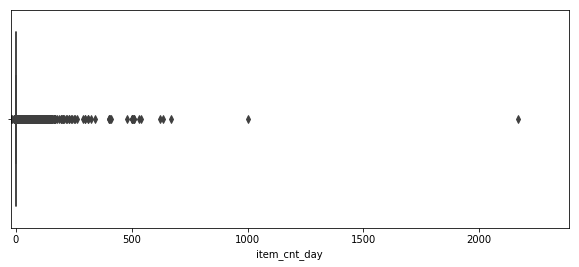

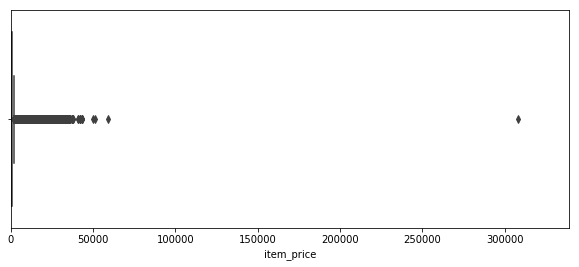

In [12]:
plt.figure(figsize=(10,4))
plt.xlim(train.item_cnt_day.min(), train.item_cnt_day.max()*1.1)
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(train['item_price'].min(), train['item_price'].max()*1.1)
sns.boxplot(x=train.item_price)

In [13]:
train = train[train.item_price<100000]
train = train[train.item_cnt_day<1000]

In [14]:
# Якутск Орджоникидзе, 56
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
# Якутск ТЦ "Центральный"
train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
# Жуковский ул. Чкалова 39м²
train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

In [15]:
shops.loc[shops['shop_name'] == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'
shops['city_code'] = LabelEncoder().fit_transform(shops['city'])
shops = shops[['shop_id','city_code']]

cats['split'] = cats['item_category_name'].str.split('-')
cats['type'] = cats['split'].map(lambda x: x[0].strip())
cats['type_code'] = LabelEncoder().fit_transform(cats['type'])
# if subtype is nan then type
cats['subtype'] = cats['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
cats['subtype_code'] = LabelEncoder().fit_transform(cats['subtype'])
cats = cats[['item_category_id','type_code', 'subtype_code']]

items.drop(['item_name'], axis=1, inplace=True)

In [16]:
len(list(set(test.item_id) - set(test.item_id).intersection(set(train.item_id)))), len(list(set(test.item_id))), len(test)

(363, 5100, 214200)

In [17]:
#train = train.drop('item_price', axis=1)

In [18]:
train_items = train['item_id'].unique()

In [19]:
test_items = test['item_id'].unique()

In [20]:
len(train['item_id'].unique())

21806

In [21]:
len(test['item_id'].unique())

5100

In [22]:
train_shops = train['shop_id'].unique()

In [23]:
test_shops = test['shop_id'].unique()

In [24]:
train = train.where(train['shop_id'].isin(test_shops)).dropna()

In [25]:
len(train['shop_id'].unique())

42

In [26]:
len(test['shop_id'].unique())

42

In [27]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0.0,59.0,22154.0,999.00,1.0
1,03.01.2013,0.0,25.0,2552.0,899.00,1.0
2,05.01.2013,0.0,25.0,2552.0,899.00,-1.0
3,06.01.2013,0.0,25.0,2554.0,1709.05,1.0
4,15.01.2013,0.0,25.0,2555.0,1099.00,1.0


In [28]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [29]:
len(train), len(test)

(2429277, 214200)

In [30]:
train['date_block_num'].min(), train['date_block_num'].max()

(0.0, 33.0)

In [31]:
test['date_block_num'] = pd.to_datetime('01.01.2015')

In [32]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [33]:
len(train['item_id'].unique()), len(test['item_id'].unique())

(21085, 5100)

In [34]:
train_df = train.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).agg(
                         {'item_cnt_day':'sum', 'item_price':'mean'})

In [35]:
train_df[train_df['item_cnt_day']<-9]

,date_block_num,shop_id,item_id,item_cnt_day,item_price
6139,0.0,12.0,1590.0,-13.0,2599.0
457985,10.0,12.0,8023.0,-22.0,15.0


In [36]:
train_df['item_cnt_day'] = train_df['item_cnt_day']+23

In [37]:
len(train_df['item_id'].unique()), len(test['item_id'].unique())

(21085, 5100)

In [38]:
train_df['date_block_num'] = train_df.apply(lambda x: pd.to_datetime('01-01-2013') + 
                                            pd.DateOffset(months = x['date_block_num'] + 1), axis=1)

In [39]:
train_df.head()

,date_block_num,shop_id,item_id,item_cnt_day,item_price
0,2013-02-01,2.0,27.0,24.0,2499.0
1,2013-02-01,2.0,33.0,24.0,499.0
2,2013-02-01,2.0,317.0,24.0,299.0
3,2013-02-01,2.0,438.0,24.0,299.0
4,2013-02-01,2.0,471.0,25.0,399.0


In [40]:
#add_datepart(train_df, "date_block_num", drop=True)
#add_datepart(test, "date_block_num", drop=True)

In [41]:
train_df['date_block_num'].unique()

array(['2013-02-01T00:00:00.000000000', '2013-03-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2013-06-01T00:00:00.000000000', '2013-07-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-11-01T00:00:00.000000000', '2013-12-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2014-03-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2014-08-01T00:00:00.000000000', '2014-09-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2015-02-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-

In [42]:
train_df = pd.merge(train_df, shops, on=['shop_id'], how='left')
train_df = pd.merge(train_df, items, on=['item_id'], how='left')
train_df = pd.merge(train_df, cats, on=['item_category_id'], how='left')
train_df['city_code'] = train_df['city_code'].astype(np.int8)
train_df['item_category_id'] = train_df['item_category_id'].astype(np.int8)
train_df['type_code'] = train_df['type_code'].astype(np.int8)
train_df['subtype_code'] = train_df['subtype_code'].astype(np.int8)


In [43]:
test = pd.merge(test, shops, on=['shop_id'], how='left')
test = pd.merge(test, items, on=['item_id'], how='left')
test = pd.merge(test, cats, on=['item_category_id'], how='left')
test['city_code'] = test['city_code'].astype(np.int8)
test['item_category_id'] = test['item_category_id'].astype(np.int8)
test['type_code'] = test['type_code'].astype(np.int8)
test['subtype_code'] = test['subtype_code'].astype(np.int8)

In [44]:
train_df = train_df.where(train_df['item_id'].isin(test_items)).dropna()
train_df = pd.concat([train_df,test], sort=False).drop_duplicates().reset_index(drop=True)
train_df.drop('ID', 1, inplace=True)

In [45]:
len(test.item_id.unique())

5100

In [46]:
temp = train_df.groupby(['item_id'], as_index=False).agg({'item_cnt_day':'sum', 'item_price':'mean'})

In [47]:
temp.head()

,item_id,item_cnt_day,item_price
0,30.0,10699.0,263.590124
1,31.0,10773.0,514.417212
2,32.0,16588.0,223.206066
3,33.0,11514.0,242.330000
4,38.0,1223.0,2353.156863


In [48]:
test['item_price'] = test['item_id'].map(temp.set_index(['item_id'])['item_price'])

In [49]:
len(train_df['item_id'].unique()), len(test['item_id'].unique())

(5100, 5100)

In [50]:
train_df.head()

,date_block_num,shop_id,item_id,item_cnt_day,item_price,city_code,item_category_id,type_code,subtype_code
0,2013-02-01,2.0,33.0,24.0,499.0,0.0,37.0,11.0,1.0
1,2013-02-01,2.0,482.0,24.0,3300.0,0.0,73.0,15.0,0.0
2,2013-02-01,2.0,491.0,24.0,600.0,0.0,73.0,15.0,0.0
3,2013-02-01,2.0,839.0,24.0,3300.0,0.0,73.0,15.0,0.0
4,2013-02-01,2.0,1007.0,26.0,449.0,0.0,67.0,14.0,52.0


In [51]:
test_df = test
test_df.head()

,ID,shop_id,item_id,date_block_num,city_code,item_category_id,type_code,subtype_code,item_price
0,0,5,5037,2015-01-01,3,19,5,10,1920.154628
1,1,5,5320,2015-01-01,3,55,13,2,NaN
2,2,5,5233,2015-01-01,3,19,5,10,845.070116
3,3,5,5232,2015-01-01,3,23,5,16,791.506867
4,4,5,5268,2015-01-01,3,20,5,11,NaN


In [52]:
train_df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_day', 'item_price',
       'city_code', 'item_category_id', 'type_code', 'subtype_code'],
      dtype='object')

In [53]:
#train_df.columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'item_price',
#                    'city_code', 'cats', 'type_code', 'subtype_code']
train_df.rename(index=str, columns={"item_cnt_day": "item_cnt_month"}, inplace=True)
train_df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'item_price',
       'city_code', 'item_category_id', 'type_code', 'subtype_code'],
      dtype='object')

In [54]:
train_df.head(10)

,date_block_num,shop_id,item_id,item_cnt_month,item_price,city_code,item_category_id,type_code,subtype_code
0,2013-02-01,2.0,33.0,24.0,499.0,0.0,37.0,11.0,1.0
1,2013-02-01,2.0,482.0,24.0,3300.0,0.0,73.0,15.0,0.0
2,2013-02-01,2.0,491.0,24.0,600.0,0.0,73.0,15.0,0.0
3,2013-02-01,2.0,839.0,24.0,3300.0,0.0,73.0,15.0,0.0
4,2013-02-01,2.0,1007.0,26.0,449.0,0.0,67.0,14.0,52.0
5,2013-02-01,2.0,1010.0,24.0,449.0,0.0,67.0,14.0,52.0
6,2013-02-01,2.0,1023.0,25.0,299.0,0.0,67.0,14.0,52.0
7,2013-02-01,2.0,1204.0,24.0,299.0,0.0,55.0,13.0,2.0
8,2013-02-01,2.0,1224.0,24.0,399.0,0.0,55.0,13.0,2.0
9,2013-02-01,2.0,1247.0,24.0,299.0,0.0,55.0,13.0,2.0


In [55]:
train_df.head().T.head(40)

,0,1,2,3,4
date_block_num,2013-02-01 00:00:00,2013-02-01 00:00:00,2013-02-01 00:00:00,2013-02-01 00:00:00,2013-02-01 00:00:00
shop_id,2,2,2,2,2
item_id,33,482,491,839,1007
item_cnt_month,24,24,24,24,26
item_price,499,3300,600,3300,449
city_code,0,0,0,0,0
item_category_id,37,73,73,73,67
type_code,11,15,15,15,14
subtype_code,1,0,0,0,52


In [56]:
train_df['item_cnt_month'].mean()

25.68975883592467

In [57]:
len(train_df), len(test_df)

(815948, 214200)

In [58]:
dep = 'item_cnt_month'
test_df[dep] = 0

In [59]:
#test_df.columns = ['ID', 'shop_id', 'item_id', 'date_block_num', 'city_code', 'cats', 
#                   'type_code', 'subtype_code', 'item_price', 'item_cnt_month']
test_df.head()

,ID,shop_id,item_id,date_block_num,city_code,item_category_id,type_code,subtype_code,item_price,item_cnt_month
0,0,5,5037,2015-01-01,3,19,5,10,1920.154628,0
1,1,5,5320,2015-01-01,3,55,13,2,NaN,0
2,2,5,5233,2015-01-01,3,19,5,10,845.070116,0
3,3,5,5232,2015-01-01,3,23,5,16,791.506867,0
4,4,5,5268,2015-01-01,3,20,5,11,NaN,0


In [60]:
cat_vars = ['shop_id', 'item_id', 'city_code', 'item_category_id', 'type_code', 'subtype_code']

contin_vars = ['item_price'] #'item_price'

n = len(train_df); n

815948

In [61]:
train_df.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price,city_code,item_category_id,type_code,subtype_code
0,2013-02-01,2.0,33.0,24.0,499.0,0.0,37.0,11.0,1.0
1,2013-02-01,2.0,482.0,24.0,3300.0,0.0,73.0,15.0,0.0
2,2013-02-01,2.0,491.0,24.0,600.0,0.0,73.0,15.0,0.0
3,2013-02-01,2.0,839.0,24.0,3300.0,0.0,73.0,15.0,0.0
4,2013-02-01,2.0,1007.0,26.0,449.0,0.0,67.0,14.0,52.0


In [62]:
train_df = train_df[cat_vars+contin_vars+[dep, 'date_block_num']].copy()

In [63]:
test_df.isna().any()

ID                  False
shop_id             False
item_id             False
date_block_num      False
city_code           False
item_category_id    False
type_code           False
subtype_code        False
item_price           True
item_cnt_month      False
dtype: bool

In [64]:
test_df = test_df[cat_vars+contin_vars+[dep, 'date_block_num', 'ID']].copy()
test_df.head()

,shop_id,item_id,city_code,item_category_id,type_code,subtype_code,item_price,item_cnt_month,date_block_num,ID
0,5,5037,3,19,5,10,1920.154628,0,2015-01-01,0
1,5,5320,3,55,13,2,NaN,0,2015-01-01,1
2,5,5233,3,19,5,10,845.070116,0,2015-01-01,2
3,5,5232,3,23,5,16,791.506867,0,2015-01-01,3
4,5,5268,3,20,5,11,NaN,0,2015-01-01,4


In [65]:
imputer = Imputer()
train_df[contin_vars+[dep]] = imputer.fit_transform(train_df[contin_vars+[dep]])
test_df[contin_vars] = imputer.fit_transform(test_df[contin_vars])

for v in contin_vars:
    train_df[v] = train_df[v].astype('float32')
    test_df[v] = test_df[v].astype('float32')
    
train_df[dep] = train_df[dep].astype('float32')
test_df[dep] = test_df[dep].astype('float32')

In [66]:
for v in cat_vars: train_df[v] = train_df[v].astype('category').cat.as_ordered()
    
train_df['date_block_num'] = train_df['date_block_num'].astype('category').cat.as_ordered()
test_df['date_block_num'] = test_df['date_block_num'].astype('category').cat.as_ordered()

In [67]:
    
train_df['date_block_num'] =  pd.to_datetime(train_df['date_block_num'])
test_df['date_block_num'] = pd.to_datetime(test_df['date_block_num'])

In [68]:
apply_cats(test_df, train_df)

In [69]:
len(train_df), len(train_df)/5

(815948, 163189.6)

In [70]:
train_df.isna().sum(), test_df.isna().sum()

(shop_id             0
 item_id             0
 city_code           0
 item_category_id    0
 type_code           0
 subtype_code        0
 item_price          0
 item_cnt_month      0
 date_block_num      0
 dtype: int64, shop_id             0
 item_id             0
 city_code           0
 item_category_id    0
 type_code           0
 subtype_code        0
 item_price          0
 item_cnt_month      0
 date_block_num      0
 ID                  0
 dtype: int64)

In [71]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815948 entries, 0 to 815947
Data columns (total 9 columns):
shop_id             815948 non-null category
item_id             815948 non-null category
city_code           815948 non-null category
item_category_id    815948 non-null category
type_code           815948 non-null category
subtype_code        815948 non-null category
item_price          815948 non-null float32
item_cnt_month      815948 non-null float32
date_block_num      815948 non-null datetime64[ns]
dtypes: category(6), datetime64[ns](1), float32(2)
memory usage: 24.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 10 columns):
shop_id             214200 non-null category
item_id             214200 non-null category
city_code           214200 non-null category
item_category_id    214200 non-null category
type_code           214200 non-null category
subtype_code        214200 non-null category
item_price          214200 non-

(None, None)

In [72]:
samp_size = n
len(train_df)

815948

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815948 entries, 0 to 815947
Data columns (total 9 columns):
shop_id             815948 non-null category
item_id             815948 non-null category
city_code           815948 non-null category
item_category_id    815948 non-null category
type_code           815948 non-null category
subtype_code        815948 non-null category
item_price          815948 non-null float32
item_cnt_month      815948 non-null float32
date_block_num      815948 non-null datetime64[ns]
dtypes: category(6), datetime64[ns](1), float32(2)
memory usage: 24.3+ MB


In [74]:
len(train_df)

815948

In [75]:
len(test_df)

214200

In [76]:
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)
train_df.to_feather("train")
test_df.to_feather("test")

In [77]:
train_df = pd.read_feather("train")
test_df = pd.read_feather("test")

C:\Users\chrun\Anaconda3\envs\fastai\lib\site-packages\pandas\io\feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [78]:
train_df.drop('index', 1, inplace=True)
test_df.drop('index', 1, inplace=True)

In [79]:
joined_samp = train_df.sort_values(by='date_block_num')
#joined_samp['date_block_num'] = joined_samp['date_block_num'].astype('category').cat.as_ordered()
joined_samp = joined_samp.set_index('date_block_num')
#joined_samp.reset_index(inplace=True)

In [80]:
joined_samp.head() 

,shop_id,item_id,city_code,item_category_id,type_code,subtype_code,item_price,item_cnt_month
date_block_num,,,,,,,,
2013-02-01,2.0,33.0,0.0,37.0,11.0,1.0,499.000,24.0
2013-02-01,42.0,5572.0,19.0,2.0,1.0,10.0,1589.875,27.0
2013-02-01,42.0,5552.0,19.0,55.0,13.0,2.0,299.000,24.0
2013-02-01,42.0,5539.0,19.0,55.0,13.0,2.0,299.000,24.0
2013-02-01,42.0,5472.0,19.0,60.0,13.0,48.0,9599.000,24.0


In [81]:
joined_samp.isna().any()

shop_id             False
item_id             False
city_code           False
item_category_id    False
type_code           False
subtype_code        False
item_price          False
item_cnt_month      False
dtype: bool

In [82]:
joined_samp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 815948 entries, 2013-02-01 to 2015-11-01
Data columns (total 8 columns):
shop_id             815948 non-null category
item_id             815948 non-null category
city_code           815948 non-null category
item_category_id    815948 non-null category
type_code           815948 non-null category
subtype_code        815948 non-null category
item_price          815948 non-null float32
item_cnt_month      815948 non-null float32
dtypes: category(6), float32(2)
memory usage: 18.1 MB


In [83]:
df, y, nas, mapper = proc_df(joined_samp, 'item_cnt_month', do_scale=True)

In [84]:
joined_test = test_df.sort_values('date_block_num')
joined_test = joined_test.set_index('date_block_num')

In [85]:
joined_test.head()

,shop_id,item_id,city_code,item_category_id,type_code,subtype_code,item_price,item_cnt_month,ID
date_block_num,,,,,,,,,
2015-01-01,5.0,5037.0,3.0,19.0,5.0,10.0,1920.154663,0.0,0
2015-01-01,57.0,18049.0,29.0,70.0,14.0,57.0,297.863647,0.0,142793
2015-01-01,57.0,18027.0,29.0,70.0,14.0,57.0,296.142853,0.0,142794
2015-01-01,57.0,18454.0,29.0,55.0,13.0,2.0,181.358047,0.0,142795
2015-01-01,57.0,16188.0,29.0,64.0,14.0,42.0,1256.974976,0.0,142796


In [86]:
len(joined_test)

214200

In [87]:
joined_test.isna().sum()

shop_id             0
item_id             0
city_code           0
item_category_id    0
type_code           0
subtype_code        0
item_price          0
item_cnt_month      0
ID                  0
dtype: int64

In [88]:
df_test, _, nas, mapper = proc_df(joined_test, 'item_cnt_month', do_scale=True, 
                                  skip_flds=['ID'], mapper=mapper, na_dict=nas)

In [89]:
len(df_test)

214200

In [90]:
from sklearn.metrics import mean_squared_error

def exp_rmse(y_pred, targ):
    return math.sqrt(mean_squared_error(targ, y_pred))

In [91]:
#yl = np.log(y)
#np.where(y<0)
#np.where(yl>6)
len(y)

815948

In [92]:
yl = np.log(y)
max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [93]:
train_df['date_block_num'].max()

Timestamp('2015-11-01 00:00:00')

In [94]:
val_idx = train_df[train_df['date_block_num'] >= '2015-08-01'].index

len(val_idx), #len(idxs), (len(val_idx)/len(idxs))*100

(110572,)

In [95]:
val_idx = val_idx.astype('int')

In [96]:
len(val_idx), len(y), len(df), len(df_test)

(110572, 815948, 815948, 214200)

In [97]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl, cat_flds=cat_vars, bs=128,
                                       test_df=df_test)

In [98]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]

In [99]:
cat_sz

[('shop_id', 43),
 ('item_id', 5101),
 ('city_code', 29),
 ('item_category_id', 63),
 ('type_code', 17),
 ('subtype_code', 50)]

In [100]:
emb_szs = [(c, max(10, min(50, (c+1)//2))) for _,c in cat_sz]

In [101]:
emb_szs

[(43, 22), (5101, 50), (29, 15), (63, 32), (17, 10), (50, 25)]

In [102]:
df.isna().any()

shop_id             False
item_id             False
city_code           False
item_category_id    False
type_code           False
subtype_code        False
item_price          False
dtype: bool

In [103]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [104]:
lr = 1e-4
m.lr_find()

 62%|████████████████████████████████████████▉                         | 3419/5511 [00:37<00:23, 90.02it/s, loss=0.128]

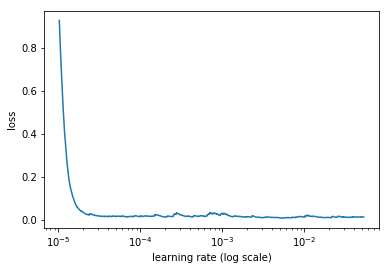

In [105]:
m.sched.plot()

In [106]:
lr = 1e-5

In [107]:
len(val_idx), len(yl), len(df), len(df_test)

(110572, 815948, 815948, 214200)

In [108]:
m.fit(lr, 1, cycle_len = 3, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.014486   0.01092    0.092928  
    1      0.011081   0.009244   0.085176                                                                              
    2      0.010053   0.008989   0.083663                                                                              


[array([0.00899]), 0.08366345751018048]

In [109]:
m.save("predict_sales_3E")

In [110]:
m.load("predict_sales_3E")

In [111]:
m.fit(lr, 1, cycle_len = 4, cycle_mult = 1, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.009523   0.008396   0.080626  
    1      0.007908   0.007969   0.07842                                                                               
    2      0.008511   0.007895   0.078276                                                                              
    3      0.008527   0.007812   0.077676                                                                              


[array([0.00781]), 0.07767638867015052]

In [112]:
m.save("predict_sales_7E") 

In [113]:
m.load("predict_sales_7E")

In [114]:
m.fit(lr, 3, cycle_len = 2, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.008207   0.008088   0.079204  
    1      0.007901   0.007586   0.076505                                                                              
    2      0.007037   0.007411   0.07561                                                                               
    3      0.008688   0.007377   0.075547                                                                              
    4      0.006274   0.00732    0.075174                                                                              
    5      0.008043   0.007292   0.075109                                                                              
    6      0.006753   0.007289   0.075037                                                                              
    7      0.00804    0.00727    0.075346                                                                           

[array([0.00699]), 0.0735246468548892]

In [115]:
m.save("predict_sales_7E_14ER") 

In [130]:
m.load("predict_sales_7E_14ER") 

In [128]:
m.fit(lr, 3, cycle_len = 2, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.006564   0.007114   0.074307  
 24%|███████████████▌                                                | 1340/5511 [00:13<00:43, 95.74it/s, loss=0.00707]

KeyboardInterrupt: 

In [ ]:
m.save("predict_sales_7E_28ER") 

# Test Set

In [131]:
x,y=m.predict_with_targs()
x = torch.from_numpy(x)
y = torch.from_numpy(y)
exp_rmse(x,y)

#pred_test=m.predict(True)

0.08361417384964379

In [132]:
log_preds = m.predict(True)

In [133]:
log_preds

array([[3.22564],
       [3.20921],
       [3.1923 ],
       ...,
       [3.31527],
       [3.2075 ],
       [3.20574]], dtype=float32)

In [134]:
log_test = np.exp(log_preds)

In [135]:
log_test

array([[25.16961],
       [24.75948],
       [24.34439],
       ...,
       [27.52986],
       [24.71718],
       [24.67385]], dtype=float32)

In [136]:
log_test=log_test-23

In [137]:
log_test

array([[2.16961],
       [1.75948],
       [1.34439],
       ...,
       [4.52986],
       [1.71718],
       [1.67385]], dtype=float32)

In [138]:
len(test), len(df_test)

(214200, 214200)

In [139]:
test['item_cnt_month'] = log_test

In [140]:
test.head()

,ID,shop_id,item_id,date_block_num,city_code,item_category_id,type_code,subtype_code,item_price,item_cnt_month
0,0,5,5037,2015-01-01,3,19,5,10,1920.154628,2.169607
1,1,5,5320,2015-01-01,3,55,13,2,NaN,1.759476
2,2,5,5233,2015-01-01,3,19,5,10,845.070116,1.344387
3,3,5,5232,2015-01-01,3,23,5,16,791.506867,1.790327
4,4,5,5268,2015-01-01,3,20,5,11,NaN,1.612965


In [141]:
csv_fn=f'{PATH}submission.csv'

test[['ID','item_cnt_month']].to_csv(csv_fn, index=False)

In [142]:
test[['ID','item_cnt_month']]

,ID,item_cnt_month
0,0,2.169607
1,1,1.759476
2,2,1.344387
3,3,1.790327
4,4,1.612965
5,5,1.329283
6,6,1.786982
7,7,1.922243
8,8,2.066202
9,9,2.619581
